# PINN Introduction

In [ ]:
# Run this cell is you are using Google Colab
!git clone https://github.com/CPSHub/LecturePhysicsAwareML.git
%cd LecturePhysicsAwareML/PINNs
%pip install -e .

In [1]:
# Run this cell, if you are working locally
%cd ..
%pip install -e .

/Users/jaosch/projects/LecturePhysicsAwareML/PINNs
Obtaining file:///Users/jaosch/projects/LecturePhysicsAwareML/PINNs
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for paml_pinns (pyproject.toml) ... done
  Created wheel for paml_pinns: filename=paml_pinns-25.2-0.editable-py3-none-any.whl size=3017 sha256=f6d087b1f41d38c4314af1ae1a1bc3da93e1c3c9299b3c9b08f1383b0d6cdd83
  Stored in directory: /private/var/folders/26/rbqx96js0w9gh1_20qpttvhr0000gn/T/pip-ephem-wheel-cache-8e1dszx5/wheels/3e/11/69/742392a6c824bcfbb0ae8c43d34fff9d88de24f25f98e19c72
Successfully built paml_pinns
  Attempting uninstall: paml_pinns
    Found existing installation: paml_pinns 25.2
    Uninstalling paml_pinns-25.2:
      Successfully uninstalled paml_pinns-25.2

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] T

### Define boundary conditions.

In [1]:
import jax.numpy as jnp
from paml_pinns.lebb import Config, get_data_decorator


@get_data_decorator
def get_data(config: Config):
    if config.bc_case == 0:
        w_bc_coords = jnp.array([0.])
        w_bc_values = jnp.array([0.])
        w_x_bc_coords = jnp.array([0.])
        w_x_bc_values = jnp.array([0.])
        M_bc_coords = jnp.array([config.L])
        M_bc_values = jnp.array([0.])
        Q_bc_coords = jnp.array([config.L])
        Q_bc_values = jnp.array([config.F])
    elif config.bc_case == 1:
        # Start of task scope
        ######################
        pass # remove this for testing
        # w_bc_coords = 
        # w_bc_values = 
        # w_x_bc_coords = 
        # w_x_bc_values = 
        # M_bc_coords = 
        # M_bc_values = 
        # Q_bc_coords = 
        # Q_bc_values = 
        ######################
        # End of task scope
    else:
        NotImplementedError("Data generation is not implemented for these boundary conditions.")

    bc = {
        "w_bc_coords": w_bc_coords,
        "w_bc_values": w_bc_values,
        "w_x_bc_coords": w_x_bc_coords,
        "w_x_bc_values": w_x_bc_values,
        "M_bc_coords": M_bc_coords,
        "M_bc_values": M_bc_values,
        "Q_bc_coords": Q_bc_coords,
        "Q_bc_values": Q_bc_values
    }
    return bc


### Configure beam properties.

In [2]:
from paml_pinns.lebb import get_config_decorator
from typing import Tuple


@get_config_decorator
def get_config(bc_case: int) -> Tuple[float, float, float, float]:
    if bc_case == 0:
        EI = 1e6
        L = 1.0
        F = 1.0
        q = 0.0
    elif bc_case == 1:
        EI = 1e6
        L = 1.0
        F = 0.0 # Unused dummy
        q = 1.0
    else:
        NotImplementedError("No configuration implemented for these boundary conditions.")

    return EI, L, F, q

### Data generation, model creation & training

In [6]:
import jax
from paml_pinns.lebb import PINN
from paml_pinns import train


config = get_config(bc_case=0, non_dim=False)
x, y, bc, EI, L, q = get_data(config)
weights={
    "w_bc": 1.0,
    "w_x_bc": 1.0,
    "M_bc": 1.0,
    "Q_bc": 1.0,
    "rw": 1.0
}

key = jax.random.PRNGKey(1234)
model = PINN(EI, L, q, bc, key=key)

model = train(
    model,
    x,
    weights,
    steps=50_000
)

Step: 0,	Loss: 4412609536.0
Step: 1000,	Loss: 1005146.125
Step: 2000,	Loss: 6119.7900390625
Step: 3000,	Loss: 1874.91552734375
Step: 4000,	Loss: 4408.43994140625
Step: 5000,	Loss: 1639.223388671875
Step: 6000,	Loss: 2216.806396484375
Step: 7000,	Loss: 84149.265625
Step: 8000,	Loss: 473839.125
Step: 9000,	Loss: 11220.5634765625
Step: 10000,	Loss: 340930.28125
Step: 11000,	Loss: 2213.974609375
Step: 12000,	Loss: 2388.20703125
Step: 13000,	Loss: 2610.919677734375
Step: 14000,	Loss: 5685.552734375
Step: 15000,	Loss: 1820.7825927734375
Step: 16000,	Loss: 1298.6488037109375
Step: 17000,	Loss: 3269.765380859375
Step: 18000,	Loss: 2983.936767578125
Step: 19000,	Loss: 7043.04833984375
Step: 20000,	Loss: 14471.095703125
Step: 21000,	Loss: 325.6283264160156
Step: 22000,	Loss: 42776.13671875
Step: 23000,	Loss: 169833.78125
Step: 24000,	Loss: 1105.670654296875
Step: 25000,	Loss: 3883.86962890625
Step: 26000,	Loss: 1024.056640625
Step: 27000,	Loss: 216.30381774902344
Step: 28000,	Loss: 851.447509765

### Model evaluation


Evaluation:
-----------
  MSE w:     2.7321548259351403e-06
  MSE w':    8.541293027519714e-06
  MSE M:     134.89016723632812
  MSE Q:     383.9958190917969
  MSE w'''': 1.0828760110825897e-10


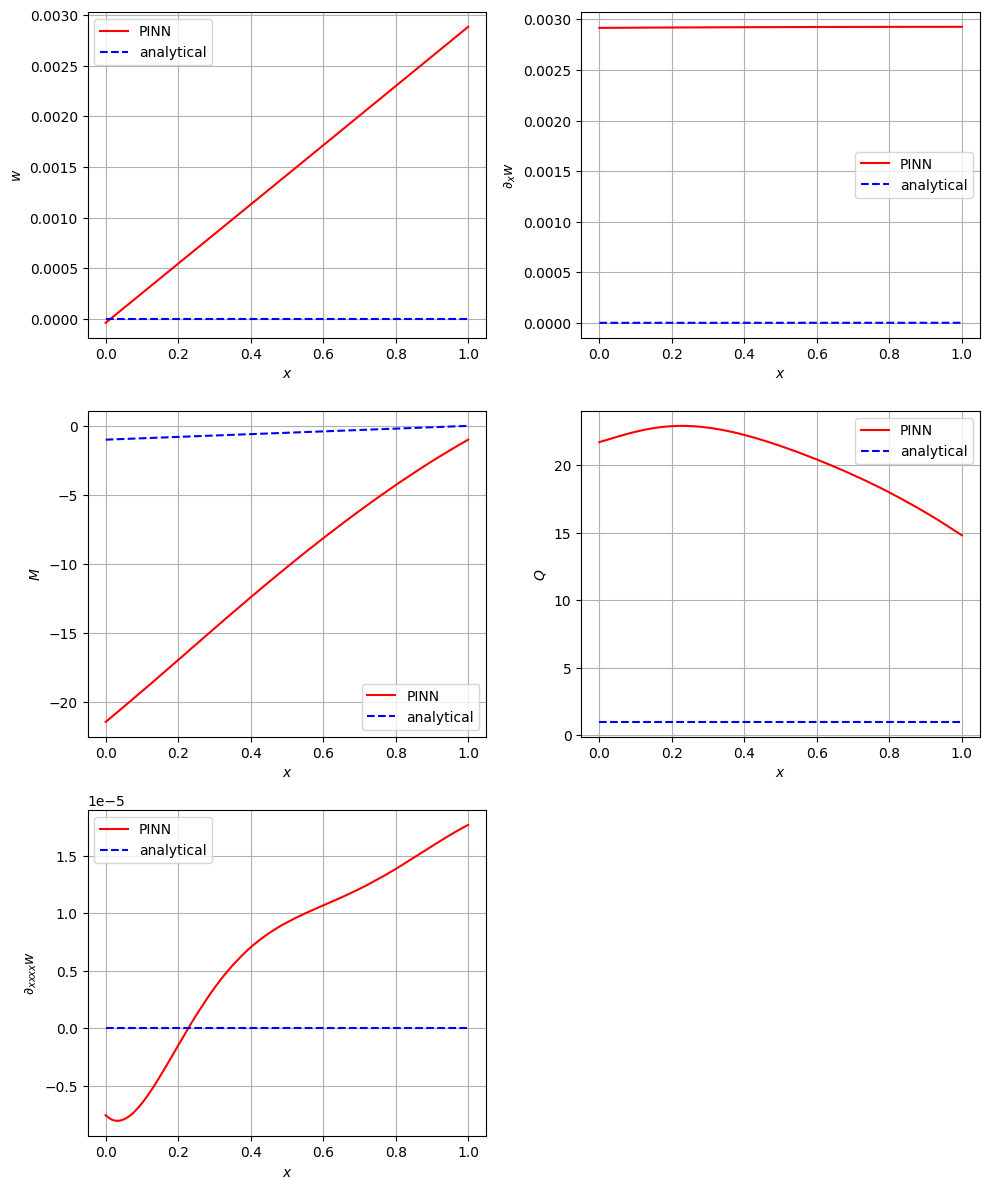

In [7]:
from paml_pinns.lebb import evaluate


evaluate(model, x, y)

### Tasks

#### Task 1: Dedimensionalization

For `bc_case=0`, ...

a) Set `EI=1e6`, and non_dim=False`. Can the model approximate the solution?

b) Now set the `EI = 1.0`. Can the model approximate the solution now?

c) Set `EI=1e6` again and set `non_dim=True`. The model should now be able approximate the solution very well. Why does it work better than a)?  

#### Task 2: Boundary conditions

Fix the boundary conditions for `bc_case=1` withing `get_data()`. Next, calibrate the PINN and test your implementation against the analytical solution. Note, boundary conditions can be set equal to `None`to be ignored.

*Solution:*

In [ ]:
import jax.numpy as jnp

from paml_pinns.lebb import Config, get_data_decorator


@get_data_decorator
def get_data(config: Config):
    if config.bc_case == 1:
        w_bc_coords = jnp.array([0., config.L])
        w_bc_values = jnp.array([0., 0.])
        w_x_bc_coords = None
        w_x_bc_values = None
        M_bc_coords = jnp.array([0., config.L])
        M_bc_values = jnp.array([0., 0.])
        Q_bc_coords = None
        Q_bc_values = None
    else:
        NotImplementedError("Data generation is not implemented for these boundary conditions.")

    bc = {
        "w_bc_coords": w_bc_coords,
        "w_bc_values": w_bc_values,
        "w_x_bc_coords": w_x_bc_coords,
        "w_x_bc_values": w_x_bc_values,
        "M_bc_coords": M_bc_coords,
        "M_bc_values": M_bc_values,
        "Q_bc_coords": Q_bc_coords,
        "Q_bc_values": Q_bc_values
    }
    return bc